# PixelCNN: A Generative Model
PixelCNN is a type of autoregressive generative model developed for modeling images. It captures the dependencies between pixels, allowing it to generate new images pixel by pixel. Unlike traditional generative models, PixelCNN models the conditional distribution of each pixel given the previous ones.


## Autoregressive Models
Autoregressive models aim to predict the next element in a sequence based on prior elements. In the context of images, PixelCNN models the probability distribution of each pixel given all previous pixels in raster order (top to bottom, left to right). This enables generating images from scratch.

The key idea of PixelCNN is to factor the image's joint distribution into a product of conditional distributions:
$$ P(x) = \prod_i P(x_i | x_{1:i-1}) $$

Where each pixel is conditioned on the previous pixels.


## PixelCNN Architecture
PixelCNN uses a stack of convolutional layers where each layer is masked to ensure that the pixel at position (i, j) only depends on previous pixels. The network models the conditional probability of a pixel given its neighbors.

The structure can be visualized as:

![PixelCNN Architecture](https://camo.githubusercontent.com/2f581257c289298057989d11aa1ad507c2af397b2471c592f7b17a5dbecd731e/687474703a2f2f736572676569747572756b696e2e636f6d2f6173736574732f323031372d30322d32322d3138333031305f343739783439345f7363726f742e706e67)  <!-- Add actual image reference here -->


## PixelCNN Architecture
PixelCNN uses a stack of convolutional layers where each layer is masked to ensure that the pixel at position (i, j) only depends on previous pixels. The network models the conditional probability of a pixel given its neighbors.

The structure can be visualized as:

![PixelCNN Architecture](https://camo.githubusercontent.com/2b432c6d87633c75685c3703167c0a6b5a6d6592a7ca95540bf02f6de890052c/68747470733a2f2f6c696c69616e77656e672e6769746875622e696f2f6c696c2d6c6f672f6173736574732f696d616765732f706978656c2d636e6e2e706e67)  <!-- Add actual image reference here -->


## Masked Convolutions
PixelCNN employs masked convolutions to ensure that future pixels are not used in the computation of the current pixel's distribution. There are two types of masks:

- **Mask A**
- **Mask B**

This technique helps preserve the autoregressive nature of the model.


## Implementation

PyTorch buffers are tensor attributes associated with a PyTorch module or model similar to parameters, but unlike parameters, buffers are not updated during training.



In [21]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm



In [2]:
# Define the transform to convert PIL images to tensors
# Define the transform to binarize the data
threshold = 0.5  # Binarization threshold

transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Lambda(lambda x: (x > threshold).float())  # Binarize the data
])

# Download and load training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 38.8MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.26MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.7MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.29MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Wrap datasets in DataLoaders

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
# Example: Iterate through the train_loader

for images, labels in train_loader:
    print("Batch of images shape:", images.shape)  # [32, 1, 28, 28]
    print(images[0])
    print("Batch of labels:", labels)  # [32]
    break  # Exit after the first batch

Batch of images shape: torch.Size([64, 1, 28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
      

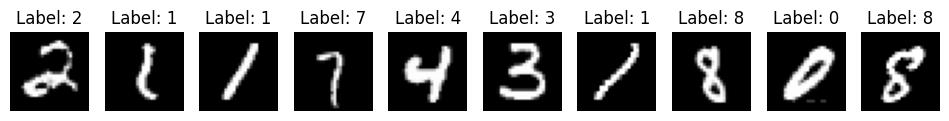

In [5]:
images, labels = next(iter(train_loader))

# Plot some sample images
num_samples = 10  # Number of samples to plot
fig, axes = plt.subplots(1, num_samples, figsize=(12, 2))

for i in range(num_samples):
    ax = axes[i]
    ax.imshow(images[i].squeeze(), cmap='gray')  # Remove the channel dimension for 2D plot
    ax.set_title(f"Label: {labels[i].item()}")
    ax.axis('off')  # Hide the axes

plt.show()

In [6]:
class MaskedConv2d(nn.Conv2d):
    """
    Class extending nn.Conv2d to use masks for autoregressive convolutions.
    """
    def __init__(self, mask_type, in_channels, out_channels, kernel_size, padding=0):
        """
        Initializes the MaskedConv2d layer.

        Args:
            mask_type (str): Type of mask ('A' or 'B').
            in_channels (int): Number of input channels.
            out_channels (int): Number of output channels.
            kernel_size (int): Size of the convolution kernel.
            padding (int): Padding applied to the input.
        """
        super(MaskedConv2d, self).__init__(in_channels, out_channels, kernel_size, padding=padding)

        # Register a buffer to store the mask, which is not a learnable parameter
        self.register_buffer('mask', torch.ones(out_channels, in_channels, kernel_size, kernel_size).float())

        # Ensure the mask type is valid
        assert mask_type in ('A', 'B'), "mask_type must be 'A' or 'B'"

        # Compute the center of the kernel
        center_h = kernel_size // 2
        center_w = kernel_size // 2

        # Apply the masking rules based on the mask type
        if mask_type == 'A':
            # For Type A: Exclude the current pixel and all future pixels
            self.mask[:, :, center_h, center_w:] = 0  # Zero out the center and to the right
            self.mask[:, :, center_h + 1:, :] = 0      # Zero out rows below the center
        else:
            # For Type B: Include the current pixel but exclude future pixels
            self.mask[:, :, center_h, center_w + 1:] = 0  # Zero out pixels to the right of the center
            self.mask[:, :, center_h + 1:, :] = 0         # Zero out rows below the center

    def forward(self, x):
        """
        Forward pass of the masked convolution.

        Args:
            x (Tensor): Input tensor.

        Returns:
            Tensor: Output tensor after applying the masked convolution.
        """
        # Apply the mask to the weights
        self.weight.data *= self.mask

        # Perform the convolution operation
        return super(MaskedConv2d, self).forward(x)

In [7]:
# Assuming MaskedConv2d is defined and imported as per the previous implementation
masked_conv_a = MaskedConv2d(mask_type='A', in_channels=3, out_channels=3, kernel_size=3, padding=2)
print("MaskedConv2d Type A:\n", masked_conv_a)

# Print the initial kernel (weights) of Type A
print("Kernel (weights) of MaskedConv2d Type A before masking:\n", masked_conv_a.weight)



MaskedConv2d Type A:
 MaskedConv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
Kernel (weights) of MaskedConv2d Type A before masking:
 Parameter containing:
tensor([[[[ 0.0050,  0.0982, -0.1364],
          [ 0.1370, -0.1742,  0.0643],
          [ 0.0438,  0.0785,  0.0273]],

         [[-0.1356, -0.1306,  0.1044],
          [ 0.1179, -0.1625,  0.1232],
          [ 0.0998,  0.1215,  0.1201]],

         [[-0.1680, -0.0448, -0.0552],
          [-0.1140, -0.0453,  0.0193],
          [-0.0875, -0.1676, -0.1158]]],


        [[[-0.1091, -0.1801,  0.1148],
          [ 0.0706, -0.1452, -0.1261],
          [ 0.0136, -0.1304,  0.0163]],

         [[ 0.0235,  0.1370,  0.1841],
          [-0.0323, -0.0412, -0.1770],
          [ 0.0528,  0.0918,  0.0531]],

         [[-0.0654, -0.1885,  0.1644],
          [ 0.1716,  0.0930,  0.1707],
          [ 0.1556,  0.1035,  0.1764]]],


        [[[-0.0205, -0.0817,  0.0378],
          [-0.1558,  0.0042,  0.0431],
          [-0.1815, -0.1631, -0.1

In [8]:
# Create a MaskedConv2d instance with mask type 'B'
masked_conv_b = MaskedConv2d(mask_type='B', in_channels=3, out_channels=3, kernel_size=3, padding=0)
print("MaskedConv2d Type B:\n", masked_conv_b)

# Print the initial kernel (weights) of Type B
print("Kernel (weights) of MaskedConv2d Type B before masking:\n", masked_conv_b.weight)



MaskedConv2d Type B:
 MaskedConv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
Kernel (weights) of MaskedConv2d Type B before masking:
 Parameter containing:
tensor([[[[ 0.0185,  0.0473,  0.1401],
          [ 0.0842, -0.0039, -0.0993],
          [ 0.0439,  0.0130,  0.1312]],

         [[-0.1226, -0.1086, -0.1408],
          [-0.1080, -0.1464,  0.1755],
          [ 0.0801,  0.0271, -0.0403]],

         [[-0.1064, -0.0062,  0.0105],
          [-0.0011,  0.1627, -0.1154],
          [ 0.0877, -0.1613,  0.0055]]],


        [[[ 0.1868, -0.0662, -0.0503],
          [ 0.0954,  0.0033, -0.0497],
          [ 0.0163, -0.1211,  0.1579]],

         [[ 0.1208, -0.0605,  0.0465],
          [-0.1773,  0.0960,  0.0949],
          [-0.1808,  0.0244,  0.1643]],

         [[ 0.1726, -0.0799,  0.1307],
          [ 0.0053,  0.1213, -0.1822],
          [ 0.1440,  0.1346,  0.0816]]],


        [[[-0.0844,  0.1532,  0.1537],
          [-0.0977,  0.1756, -0.1171],
          [-0.0377, -0.1492,  0.1506]],

        

In [9]:
# Test the layer with a random input tensor
x = torch.randn(1, 3, 28, 28)  # Batch size 1, 3 channels, 28x28 image

# Forward pass through Type A and Type B masked convolutions
output_a = masked_conv_a(x)
output_b = masked_conv_b(x)

# Print the masked kernel after applying the mask
print("Kernel (weights) of MaskedConv2d Type A after masking:\n", masked_conv_a.weight)
print("Kernel (weights) of MaskedConv2d Type B after masking:\n", masked_conv_b.weight)



Kernel (weights) of MaskedConv2d Type A after masking:
 Parameter containing:
tensor([[[[ 0.0050,  0.0982, -0.1364],
          [ 0.1370, -0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000]],

         [[-0.1356, -0.1306,  0.1044],
          [ 0.1179, -0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000]],

         [[-0.1680, -0.0448, -0.0552],
          [-0.1140, -0.0000,  0.0000],
          [-0.0000, -0.0000, -0.0000]]],


        [[[-0.1091, -0.1801,  0.1148],
          [ 0.0706, -0.0000, -0.0000],
          [ 0.0000, -0.0000,  0.0000]],

         [[ 0.0235,  0.1370,  0.1841],
          [-0.0323, -0.0000, -0.0000],
          [ 0.0000,  0.0000,  0.0000]],

         [[-0.0654, -0.1885,  0.1644],
          [ 0.1716,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000]]],


        [[[-0.0205, -0.0817,  0.0378],
          [-0.1558,  0.0000,  0.0000],
          [-0.0000, -0.0000, -0.0000]],

         [[-0.1235, -0.0321, -0.0544],
          [-0.1888,  0.0000, -0.0000],
       

In [10]:
# Print the output shapes
print("Output shape (Type A):", output_a.shape)
print("Output shape (Type B):", output_b.shape)


Output shape (Type A): torch.Size([1, 3, 30, 30])
Output shape (Type B): torch.Size([1, 3, 26, 26])


In [11]:
class ResidualBlock(nn.Module):
    """
    Residual block as shown in the provided architecture.
    """
    def __init__(self, mask_type, in_channels, hidden_channels, kernel_size=3, padding=1):
        """
        Initializes the ResidualBlock.

        Args:
            mask_type (str): Type of mask ('A' or 'B') for the MaskedConv2d layer.
            in_channels (int): Number of input channels.
            hidden_channels (int): Number of hidden channels for the intermediate layers.
            kernel_size (int): Size of the kernel for the MaskedConv2d layer.
            padding (int): Padding applied to the input.
        """
        super(ResidualBlock, self).__init__()

        # First layer: 1x1 convolution to reduce dimensionality
        self.conv1 = nn.Conv2d(in_channels, hidden_channels, kernel_size=1)

        # Second layer: Masked 3x3 convolution
        self.masked_conv = MaskedConv2d("B", hidden_channels, hidden_channels, kernel_size, padding)

        # Third layer: 1x1 convolution to restore dimensionality
        self.conv2 = nn.Conv2d(hidden_channels, in_channels, kernel_size=1)

        # Activation function (ReLU)
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        Forward pass of the residual block.

        Args:
            x (Tensor): Input tensor.

        Returns:
            Tensor: Output tensor after applying the residual block.
        """
        # Save the input for the skip connection
        residual = x

        # First convolution: Dimensionality reduction
        out = self.conv1(x)
        out = self.relu(out)

        # Second convolution: Masked convolution
        out = self.masked_conv(out)
        out = self.relu(out)

        # Third convolution: Dimensionality restoration
        out = self.conv2(out)

        # Add the skip connection
        out += residual


        return out


In [19]:
class PixelCNN(nn.Module):
    def __init__(self,
                 num_channels=64,
                 num_residual_blocks=5,
                 device=None):
        """
        Initializes the PixelCNN model with residual blocks.

        Args:
            num_channels (int): Number of output channels for each convolutional layer.
            num_residual_blocks (int): Number of residual blocks to stack in the architecture.
            device (torch.device, optional): The device to run the model on (e.g., 'cuda' or 'cpu').
        """
        super(PixelCNN, self).__init__()

        self.num_channels = num_channels
        self.num_residual_blocks = num_residual_blocks
        self.device = device

        # Input layer: MaskedConv2d with mask type 'A'
        self.input_layer = MaskedConv2d(
            mask_type='A',
            in_channels=1,  # Input channels for grayscale images
            out_channels=self.num_channels,
            kernel_size=7,  # Initial kernel size
            padding=3  # 'same' padding (kernel_size // 2)
        ).to(self.device)

        # Residual blocks: Stacking multiple residual blocks
        self.residual_blocks = nn.ModuleList([
            ResidualBlock(
                mask_type='B',
                in_channels=self.num_channels,
                hidden_channels=self.num_channels,
                kernel_size=3,
                padding=1  # 'same' padding
            )
            for _ in range(self.num_residual_blocks)
        ])

        # Final output convolutional layer
        self.output_layer = nn.Conv2d(
            in_channels=self.num_channels,
            out_channels=1,
            kernel_size=1  # Pointwise convolution
        )

    def forward(self, x, print_shapes=False):
        """
        Defines the forward pass through the model with optional shape debugging.

        Args:
            x (Tensor): The input tensor (image) of shape [batch_size, channels, height, width].
            print_shapes (bool): Whether to print the tensor shape at each layer.

        Returns:
            Tensor: The output tensor after passing through all layers.
        """
        if print_shapes:
            print(f"Input shape: {x.shape}")

        # Input layer
        x = self.input_layer(x)
        if print_shapes:
            print(f"After input layer: {x.shape}")

        # Residual blocks
        for i, block in enumerate(self.residual_blocks):
            x = block(x)
            if print_shapes:
                print(f"After Residual Block {i + 1}: {x.shape}")

        # Final output layer
        x = self.output_layer(x)
        if print_shapes:
            print(f"Output shape: {x.shape}")

        return x

    @torch.no_grad()
    def sample(self, img_size, num_samples=1, device=None):
        """
        Generates a batch of new images pixel by pixel using the trained PixelCNN.

        Args:
            img_size (tuple): Size of the image to generate (height, width).
            num_samples (int): Number of images to generate.
            device (torch.device, optional): The device to run the sampling on.

        Returns:
            Tensor: Batch of generated images of shape [num_samples, 1, height, width].
        """
        if device is None:
            device = self.device

        # Initialize an empty batch of images
        generated_imgs = torch.zeros(num_samples, 1, *img_size).to(device)

        # Generate the images pixel by pixel
        for i in range(img_size[0]):  # Loop over rows
            for j in range(img_size[1]):  # Loop over columns
                # Forward pass through the model
                out = self.forward(generated_imgs)

                # Get the pixel value for the current position
                pixel_value = torch.sigmoid(out[:, :, i, j])  # Map logits to probabilities

                # Sample from a Bernoulli distribution
                sampled_pixel = torch.bernoulli(pixel_value)

                # Assign the sampled pixel values back to the image
                generated_imgs[:, :, i, j] = sampled_pixel

        return generated_imgs


In [13]:
# 1. Define the arguments for the PixelCNN model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
print(device)


# Create a sample input
batch_size = 16
channels = 1
height, width = 28, 28  # Input image dimensions (e.g., MNIST images)

input_tensor = torch.randn(batch_size, channels, height, width).to(device)

# Define model parameters
num_channels = 64

# Create the PixelCNN model
model = PixelCNN(num_channels=num_channels, device=device).to(device)

# Test the model with shape printing enabled
output = model(input_tensor, print_shapes=True)


cpu
Input shape: torch.Size([16, 1, 28, 28])
After input layer: torch.Size([16, 64, 28, 28])
After Residual Block 1: torch.Size([16, 64, 28, 28])
After Residual Block 2: torch.Size([16, 64, 28, 28])
After Residual Block 3: torch.Size([16, 64, 28, 28])
After Residual Block 4: torch.Size([16, 64, 28, 28])
After Residual Block 5: torch.Size([16, 64, 28, 28])
Output shape: torch.Size([16, 1, 28, 28])


In [14]:
# Hyperparameters and setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 64
num_epochs = 5
learning_rate = 5e-6

device



device(type='cpu')

In [15]:
# Wrap datasets in DataLoaders

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [16]:
# Model, loss, and optimizer

# Define model parameters
num_channels = 64

model = PixelCNN(num_channels=num_channels, device=device).to(device)

In [17]:
loss_fn = nn.BCEWithLogitsLoss()  # Combines Sigmoid with Binary Cross-Entropy
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [20]:
# Model initialization

# Loss function and optimizer


# Training loop
num_epochs = 10
print("Starting training...")
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    # Wrap the train_loader with tqdm for a progress bar
    with tqdm(train_loader, unit="batch") as tepoch:
        tepoch.set_description(f"Epoch {epoch + 1}/{num_epochs}")
        for batch_idx, (data, _) in enumerate(tepoch):
            # Move data to device
            data = data.to(device)  # Binarized data is already in [0, 1]

            # Forward pass
            outputs = model(data)  # Logits output

            # Compute loss
            loss = loss_fn(outputs, data)  # Compare logits with binarized target

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update epoch loss
            epoch_loss += loss.item()

            # Update tqdm progress bar with the current loss
            tepoch.set_postfix(loss=loss.item())

    # Print epoch summary
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(train_loader):.4f}")


Starting training...


Epoch 1/10:   2%|▏         | 15/938 [00:25<26:37,  1.73s/batch, loss=0.643]


KeyboardInterrupt: 

In [ ]:
# Plotting function
def plot_images(images, num_rows, num_cols):
    """
    Plots a grid of generated images.

    Args:
        images (Tensor): A batch of images of shape [num_samples, height, width].
        num_rows (int): Number of rows in the grid.
        num_cols (int): Number of columns in the grid.
    """
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            axes[i, j].imshow(images[idx].cpu().numpy(), cmap="gray")
            axes[i, j].axis("off")
    plt.tight_layout()
    plt.show()



    # Set the model in evaluation mode
model.eval()

    # Generate 100 images
num_samples = 100
img_size = (28, 28)  # Size of each generated image
generated_images = model.sample(img_size=img_size, num_samples=num_samples, device=device)

    # Plot the generated images (10x10 grid)
plot_images(generated_images.squeeze(1), num_rows=10, num_cols=10)
